In [ ]:
# Import necessary libraries
from google.colab import drive
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


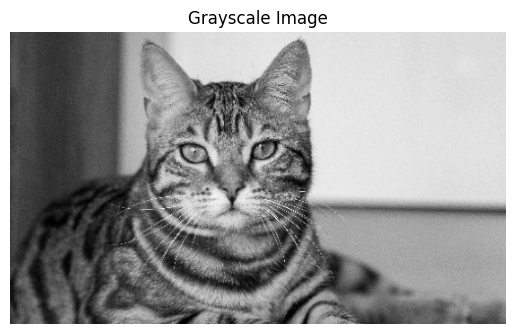

In [ ]:
# Load and display the grayscale image
img_path = '/content/drive/MyDrive/CATTO.png'
img = Image.open(img_path).convert('L')  # Convert to grayscale if it’s not already

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


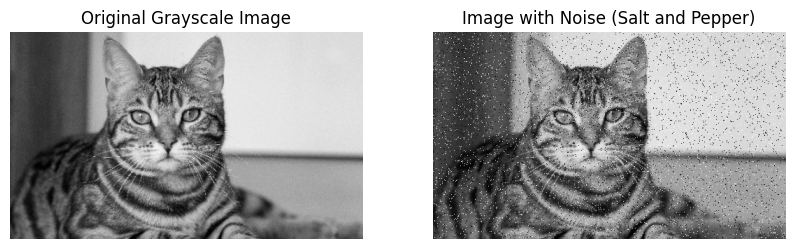

In [ ]:
img_path = '/content/drive/MyDrive/CATTO.png'
img = Image.open(img_path).convert('L')  # Convert to grayscale if it’s not already
img = np.array(img)  # Convert image to numpy array for processing

# Function to add noise
def add_noise(img, noise_type="salt_and_pepper", amount=0.05):
    noisy_img = img.copy()
    if noise_type == "salt_and_pepper":
        # Add salt and pepper noise
        num_salt = np.ceil(amount * img.size * 0.5)
        num_pepper = np.ceil(amount * img.size * 0.5)

        # Adding salt noise (white pixels)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
        noisy_img[coords[0], coords[1]] = 255

        # Adding pepper noise (black pixels)
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
        noisy_img[coords[0], coords[1]] = 0

    elif noise_type == "gaussian":
        mean = 0
        sigma = 25
        gaussian = np.random.normal(mean, sigma, img.shape)
        noisy_img = np.clip(img + gaussian, 0, 255).astype(np.uint8)

    return noisy_img

# Add noise to the image
noisy_img = add_noise(img, noise_type="salt_and_pepper", amount=0.05)

# Display the original and noisy images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Noise (Salt and Pepper)")
plt.axis('off')

plt.show()

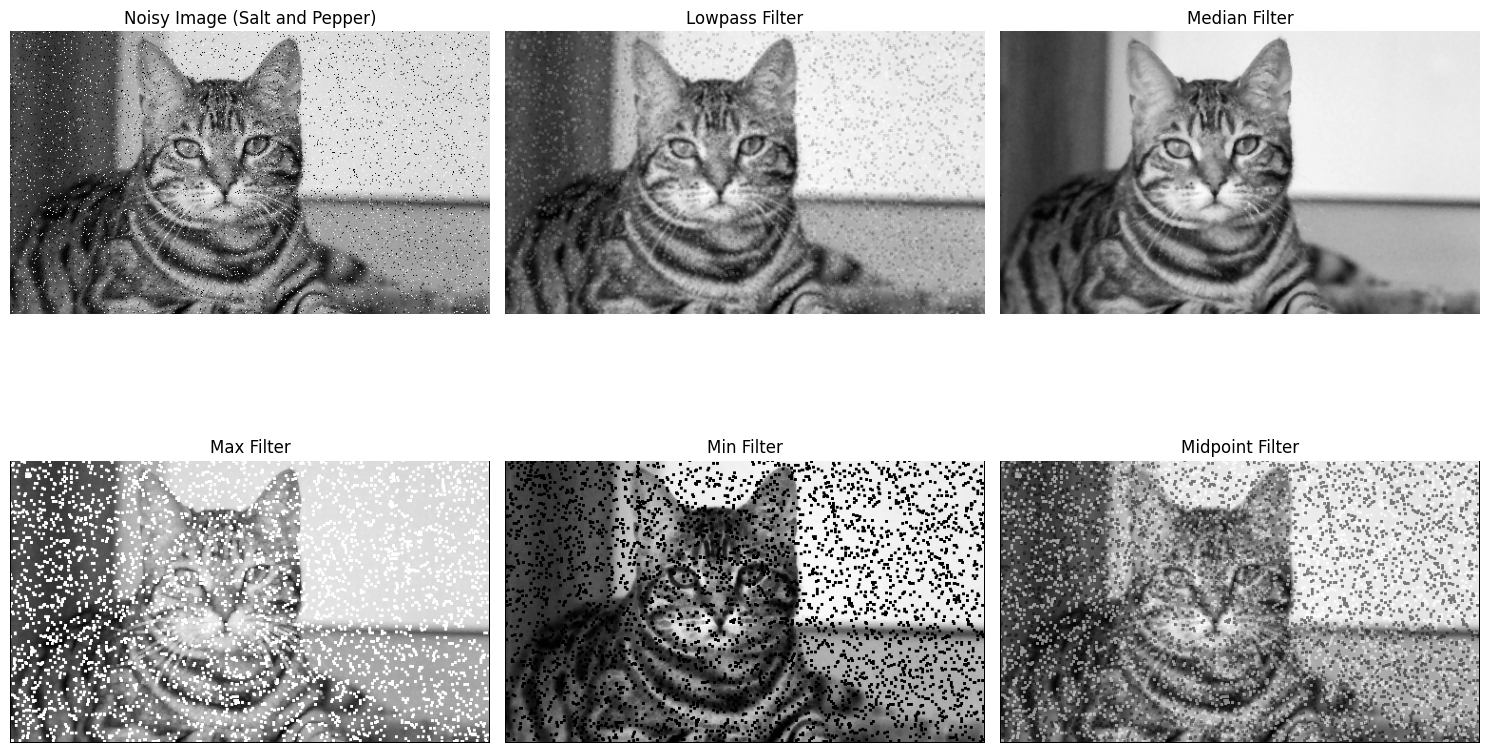

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import cv2  # Ensure that cv2 is imported

#  Lowpass filtering (Mean filter)
def lowpass_filter(img, kernel_size=3):
    return cv2.blur(img, (kernel_size, kernel_size))

#  Max filtering
def max_filter(img, kernel_size=3):
    output = np.zeros_like(img)
    for i in range(kernel_size // 2, img.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, img.shape[1] - kernel_size // 2):
            output[i, j] = np.max(img[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                      j - kernel_size // 2:j + kernel_size // 2 + 1])
    return output

#  Min filtering
def min_filter(img, kernel_size=3):
    output = np.zeros_like(img)
    for i in range(kernel_size // 2, img.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, img.shape[1] - kernel_size // 2):
            output[i, j] = np.min(img[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                      j - kernel_size // 2:j + kernel_size // 2 + 1])
    return output

#  Midpoint filtering
def midpoint_filter(img, kernel_size=3):
    output = np.zeros_like(img)
    for i in range(kernel_size // 2, img.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, img.shape[1] - kernel_size // 2):
            neighborhood = img[i - kernel_size // 2:i + kernel_size // 2 + 1,
                               j - kernel_size // 2:j + kernel_size // 2 + 1]
            output[i, j] = np.mean([np.max(neighborhood), np.min(neighborhood)])
    return output

#  Median filter using scipy
def median_filter_custom(img, kernel_size=3):
    return median_filter(img, size=kernel_size)

# Assuming 'noisy_img' is already created from the previous code
# Apply smoothing filters
lowpass_filtered = lowpass_filter(noisy_img, 3)
median_filtered = median_filter_custom(noisy_img, 3)
max_filtered = max_filter(noisy_img, 3)
min_filtered = min_filter(noisy_img, 3)
midpoint_filtered = midpoint_filter(noisy_img, 3)

# Display original and filtered images
plt.figure(figsize=(15, 10))

# Noisy image
plt.subplot(2, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image (Salt and Pepper)")
plt.axis('off')

# Lowpass Filtered image
plt.subplot(2, 3, 2)
plt.imshow(lowpass_filtered, cmap='gray')
plt.title("Lowpass Filter")
plt.axis('off')

# Median Filtered image
plt.subplot(2, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')

# Max Filtered image
plt.subplot(2, 3, 4)
plt.imshow(max_filtered, cmap='gray')
plt.title("Max Filter")
plt.axis('off')

# Min Filtered image
plt.subplot(2, 3, 5)
plt.imshow(min_filtered, cmap='gray')
plt.title("Min Filter")
plt.axis('off')

# Midpoint Filtered image
plt.subplot(2, 3, 6)
plt.imshow(midpoint_filtered, cmap='gray')
plt.title("Midpoint Filter")
plt.axis('off')

plt.tight_layout()
plt.show()
